In [1]:
# Mini project Comparing the four algorithm accuracy score and Classification report of  SVM ,LeastSquares,Perceptron,PCA and Logistic(full)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, RocCurveDisplay

sns.set(style="whitegrid", context="notebook")
random_state = 42


In [2]:

# -------------------------
# Load dataset
# -------------------------
data = datasets.load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names  # ['malignant', 'benign']

# train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=random_state
)


In [3]:

# -------------------------
# 1) Manual Simple Linear Regression (Least Squares) on ONE feature
#    (demonstration of least-squares; threshold at 0.5)
# -------------------------
feat_idx = 0  # change to use a different single feature
X_single_train = X_train[:, feat_idx]
X_single_test = X_test[:, feat_idx]

In [4]:

# compute slope m and intercept c on TRAINING data
X_mean = np.mean(X_single_train)
y_mean = np.mean(y_train.astype(float))
m = np.sum((X_single_train - X_mean) * (y_train - y_mean)) / np.sum((X_single_train - X_mean)**2)
c = y_mean - m * X_mean

In [5]:

# predictions (continuous) -> threshold to 0/1
y_pred_lr = (m * X_single_test + c >= 0.5).astype(int)
acc_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, target_names=target_names)
print("=== Manual Least Squares (1 feature) ===")
print(report_lr)
print(f"Accuracy: {acc_lr:.4f}\n")

=== Manual Least Squares (1 feature) ===
              precision    recall  f1-score   support

   malignant       0.90      0.69      0.78        64
      benign       0.84      0.95      0.89       107

    accuracy                           0.85       171
   macro avg       0.87      0.82      0.83       171
weighted avg       0.86      0.85      0.85       171

Accuracy: 0.8538



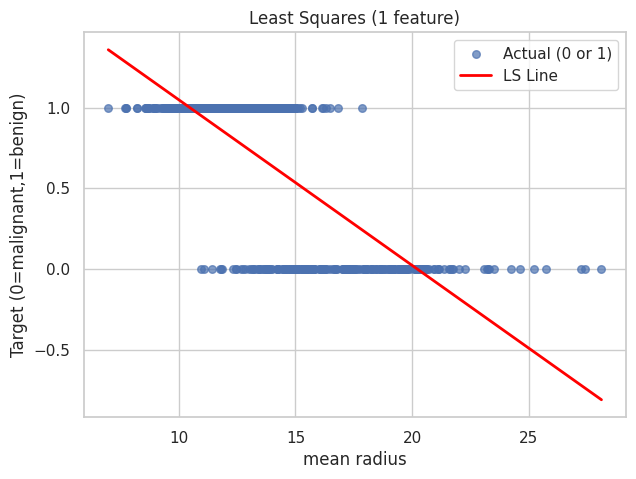

In [6]:

# Plot regression (whole dataset with LS line)
X_single_all = X[:, feat_idx]
y_all = y
y_pred_all = m * X_single_all + c
plt.figure(figsize=(7,5))
plt.scatter(X_single_all, y_all, label='Actual (0 or 1)', s=30, alpha=0.7)
order = np.argsort(X_single_all)
plt.plot(X_single_all[order], y_pred_all[order], color='red', linewidth=2, label='LS Line')
plt.xlabel(feature_names[feat_idx])
plt.ylabel('Target (0=malignant,1=benign)')
plt.title('Least Squares (1 feature)')
plt.legend()
plt.show()

In [7]:
# -------------------------
# 2) Perceptron (full features)
# -------------------------
scaler_full = StandardScaler()
X_train_full = scaler_full.fit_transform(X_train)
X_test_full = scaler_full.transform(X_test)

perceptron_full = Perceptron(random_state=random_state, max_iter=2000, tol=1e-4)
perceptron_full.fit(X_train_full, y_train)
y_pred_perc = perceptron_full.predict(X_test_full)
acc_perc = accuracy_score(y_test, y_pred_perc)
report_perc = classification_report(y_test, y_pred_perc, target_names=target_names)
print("=== Perceptron (full features) ===")
print(report_perc)
print(f"Accuracy: {acc_perc:.4f}\n")


=== Perceptron (full features) ===
              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        64
      benign       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9825



In [8]:
# -------------------------
# 3) SVM (full features) + GridSearchCV
# -------------------------
svm = SVC(kernel='rbf', probability=True, random_state=random_state)
param_grid = {'C': [0.1, 1, 10, 50], 'gamma': ['scale', 0.01, 0.1, 1]}
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_full, y_train)
best_svm = grid.best_estimator_
y_pred_svm = best_svm.predict(X_test_full)
acc_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, target_names=target_names)
print("=== SVM (full features) - GridSearch best params ===")
print("Best params:", grid.best_params_)
print(report_svm)
print(f"Accuracy: {acc_svm:.4f}\n")

=== SVM (full features) - GridSearch best params ===
Best params: {'C': 10, 'gamma': 0.01}
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        64
      benign       0.99      0.98      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9825



In [9]:
# -------------------------
# 4) PCA -> Perceptron (top-2 PCs) + PCA 2D/3D visualizations
# -------------------------
scaler_for_pca = StandardScaler()
X_scaled = scaler_for_pca.fit_transform(X)  # whole dataset scaled for PCA

pca2 = PCA(n_components=2, random_state=random_state)
X_pca_2d = pca2.fit_transform(X_scaled)
explained_ratio_2 = pca2.explained_variance_ratio_
print("PCA(2) explained variance ratio:", explained_ratio_2, "sum:", explained_ratio_2.sum())

pca3 = PCA(n_components=3, random_state=random_state)
X_pca_3d = pca3.fit_transform(X_scaled)
print("PCA(3) explained variance ratios:", pca3.explained_variance_ratio_)



PCA(2) explained variance ratio: [0.44272026 0.18971182] sum: 0.6324320765155944
PCA(3) explained variance ratios: [0.44272026 0.18971182 0.09393163]


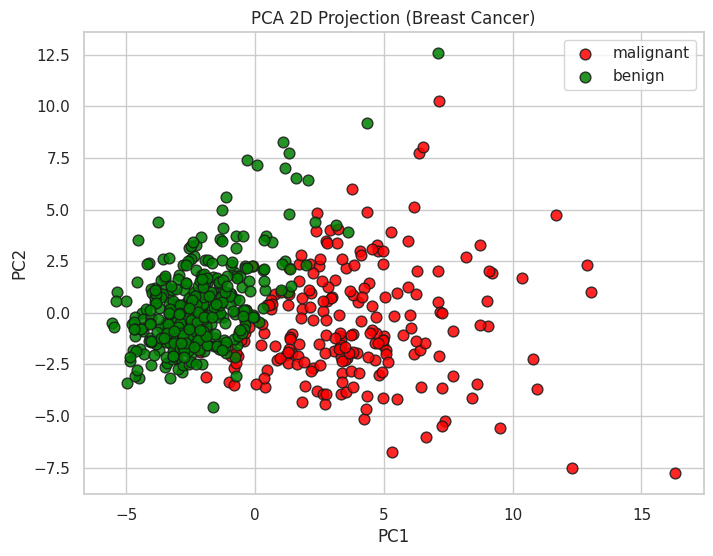

In [10]:
# 2D PCA scatter (Breast Cancer has 2 classes)
colors = ['red', 'green']
labels = [target_names[0], target_names[1]]
plt.figure(figsize=(8,6))
for color, i, label in zip(colors, [0,1], labels):
    plt.scatter(X_pca_2d[y==i,0], X_pca_2d[y==i,1], color=color, label=label, s=60, alpha=0.85, edgecolors='k')
plt.title("PCA 2D Projection (Breast Cancer)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


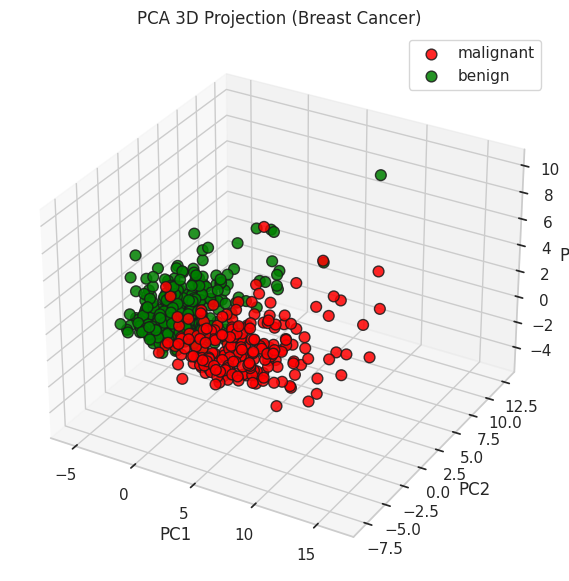

In [11]:
# 3D PCA scatter
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
for color, i, label in zip(colors, [0,1], labels):
    ax.scatter(X_pca_3d[y==i,0], X_pca_3d[y==i,1], X_pca_3d[y==i,2], color=color, label=label, s=60, alpha=0.85, edgecolors='k')
ax.set_title("PCA 3D Projection (Breast Cancer)")
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
ax.legend()
plt.show()

In [12]:
# Train Perceptron on top-2 PCA components (split with same stratify)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca_2d, y, test_size=0.30, stratify=y, random_state=random_state
)
# Optional scaling of PC space (not strictly necessary)
scaler_pca = StandardScaler()
X_pca_train_s = scaler_pca.fit_transform(X_pca_train)
X_pca_test_s = scaler_pca.transform(X_pca_test)

perc_pca = Perceptron(random_state=random_state, max_iter=2000, tol=1e-4)
perc_pca.fit(X_pca_train_s, y_pca_train)
y_pred_pca = perc_pca.predict(X_pca_test_s)
acc_pca = accuracy_score(y_pca_test, y_pred_pca)
report_pca = classification_report(y_pca_test, y_pred_pca, target_names=target_names)
print("=== Perceptron on PCA(2) features ===")
print(report_pca)
print(f"Accuracy: {acc_pca:.4f}\n")


=== Perceptron on PCA(2) features ===
              precision    recall  f1-score   support

   malignant       0.90      0.94      0.92        64
      benign       0.96      0.93      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy: 0.9357



In [13]:
# -------------------------
# 5) Logistic Regression baseline (full features)
# -------------------------
logreg = LogisticRegression(max_iter=5000, random_state=random_state)
logreg.fit(X_train_full, y_train)
y_pred_log = logreg.predict(X_test_full)
acc_log = accuracy_score(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log, target_names=target_names)
print("=== Logistic Regression (full features) ===")
print(report_log)
print(f"Accuracy: {acc_log:.4f}\n")


=== Logistic Regression (full features) ===
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Accuracy: 0.9883



In [14]:
# -------------------------
# Decision boundary visualizations (2-feature projection = first two original features)
#   - Perceptron (trained on those two features)
#   - SVM (linear kernel trained on those two features)
# -------------------------
vis_idx = [0,1]
X_vis = X[:, vis_idx]
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(
    X_vis, y, test_size=0.30, stratify=y, random_state=random_state
)
scaler_vis = StandardScaler()
X_vis_train_s = scaler_vis.fit_transform(X_vis_train)
X_vis_test_s = scaler_vis.transform(X_vis_test)


In [15]:
# Perceptron for visualization
perc_vis = Perceptron(random_state=random_state, max_iter=2000, tol=1e-4)
perc_vis.fit(X_vis_train_s, y_vis_train)

Perceptron(max_iter=2000, random_state=42, tol=0.0001)

In [16]:
# SVM linear for visualization
svm_vis = SVC(kernel='linear', C=1.0, random_state=random_state)
svm_vis.fit(X_vis_train_s, y_vis_train)

SVC(kernel='linear', random_state=42)

In [17]:

# Mesh grid using exact min/max values step 0.01 (be careful: might be heavy depending on range)
x_min, x_max = X_vis[:,0].min(), X_vis[:,0].max()
y_min, y_max = X_vis[:,1].min(), X_vis[:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
mesh_grid = np.c_[xx.ravel(), yy.ravel()] # Renamed from 'grid'
grid_s = scaler_vis.transform(mesh_grid) # Use mesh_grid here


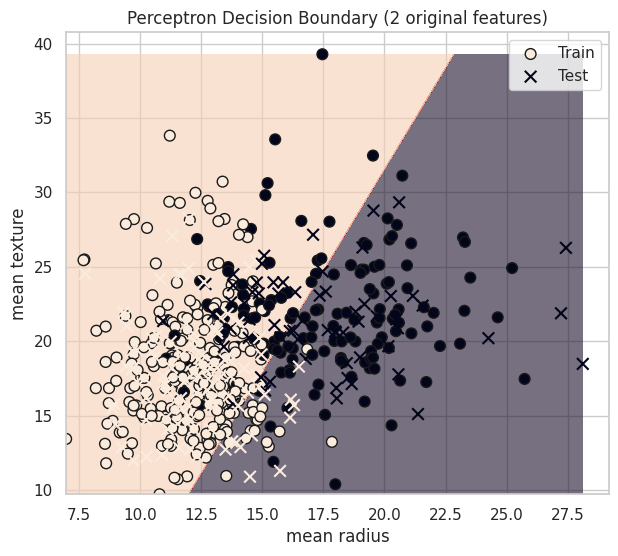

In [18]:
# Perceptron decision map
Zp = perc_vis.predict(grid_s).reshape(xx.shape)
plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Zp, alpha=0.6)
plt.scatter(X_vis_train[:,0], X_vis_train[:,1], c=y_vis_train, edgecolors='k', s=60, label='Train')
plt.scatter(X_vis_test[:,0], X_vis_test[:,1], c=y_vis_test, marker='x', s=70, label='Test')
plt.title('Perceptron Decision Boundary (2 original features)')
plt.xlabel(feature_names[vis_idx[0]])
plt.ylabel(feature_names[vis_idx[1]])
plt.legend()
plt.show()


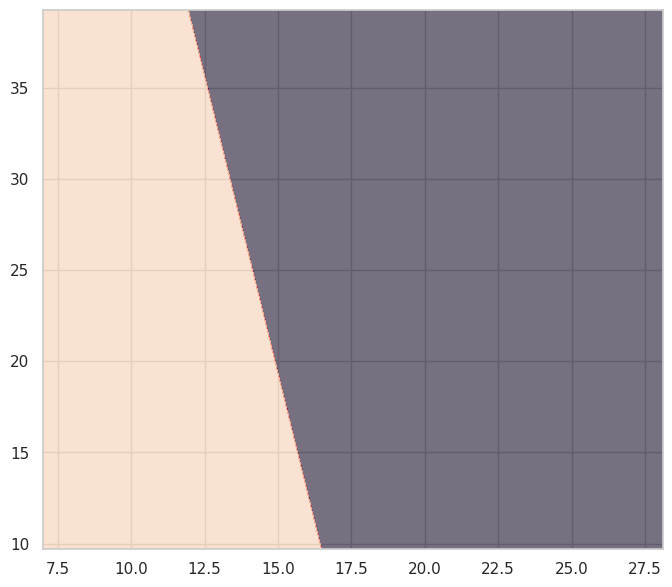

In [19]:
# SVM decision boundary + margins + support vectors
Zs = svm_vis.decision_function(grid_s).reshape(xx.shape)
Zs_class = (Zs >= 0).astype(int)
plt.figure(figsize=(8,7))
plt.contourf(xx, yy, Zs_class, alpha=0.6)

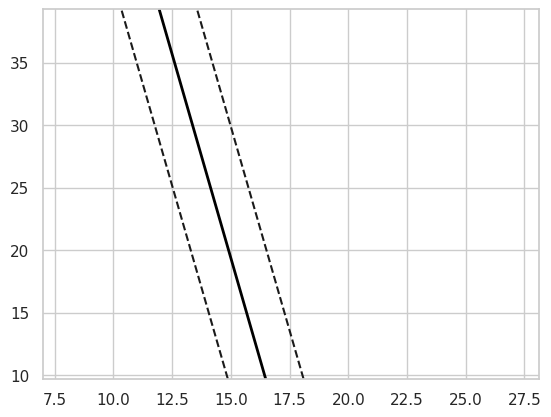

In [20]:
# boundary and margins
plt.contour(xx, yy, Zs, levels=[0.0], linewidths=2, colors='black')
plt.contour(xx, yy, Zs, levels=[-1.0, 1.0], linestyles='--', linewidths=1.5, colors='k')

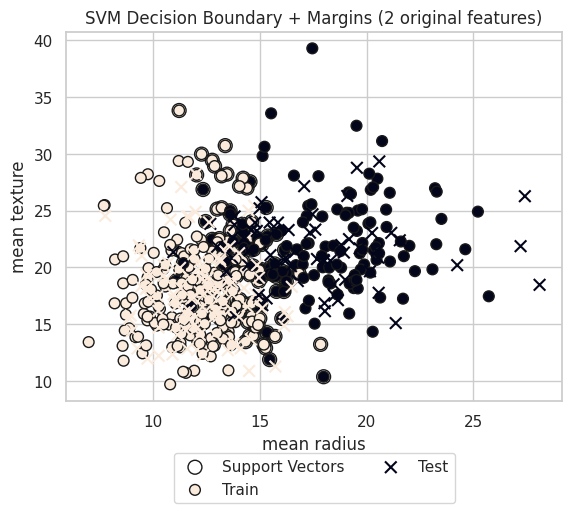

In [21]:
# support vectors (inverse-scaled to original feature space)
sv_orig = scaler_vis.inverse_transform(svm_vis.support_vectors_)
plt.scatter(sv_orig[:,0], sv_orig[:,1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.scatter(X_vis_train[:,0], X_vis_train[:,1], c=y_vis_train, edgecolors='k', s=60, label='Train')
plt.scatter(X_vis_test[:,0], X_vis_test[:,1], c=y_vis_test, marker='x', s=70, label='Test')
plt.title('SVM Decision Boundary + Margins (2 original features)')
plt.xlabel(feature_names[vis_idx[0]])
plt.ylabel(feature_names[vis_idx[1]])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.show()


=== Accuracy Summary ===
       Model  Accuracy
LeastSquares  0.853801
  Perceptron  0.982456
         SVM  0.982456
         PCA  0.935673
    Logistic  0.988304


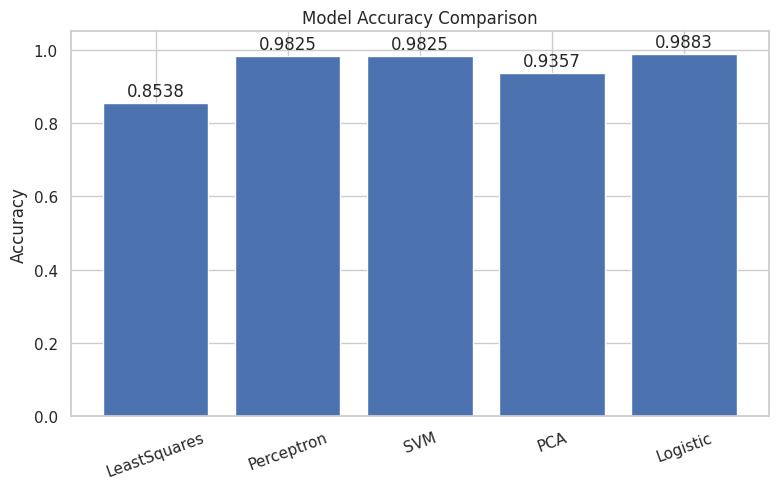

In [27]:

# -------------------------
# Final accuracy comparison table & bar chart
# -------------------------
models = ['LeastSquares', 'Perceptron', 'SVM', 'PCA', 'Logistic']
accuracies = [acc_lr, acc_perc, acc_svm, acc_pca, acc_log]

summary_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print("\n=== Accuracy Summary ===")
print(summary_df.to_string(index=False))

plt.figure(figsize=(9,5))
bars = plt.bar(summary_df['Model'], summary_df['Accuracy'])
plt.ylim(0,1.05)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.02, f"{acc:.4f}", ha='center')
plt.xticks(rotation=20)
plt.show()

# -------------------------
# End. Optionally save summary to CSV
# -------------------------
# summary_df.to_csv('model_accuracy_summary.csv', index=False)